In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import time

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [11]:
last_date =  session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date 
# to get the last 12 months of data, last date - 365
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)


2016-08-23


In [12]:
# query to pull the last year of precipitation data
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).order_by(Measurement.date).all()
rain 

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
rain_df = pd.DataFrame(rain).dropna()
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15


In [14]:

rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


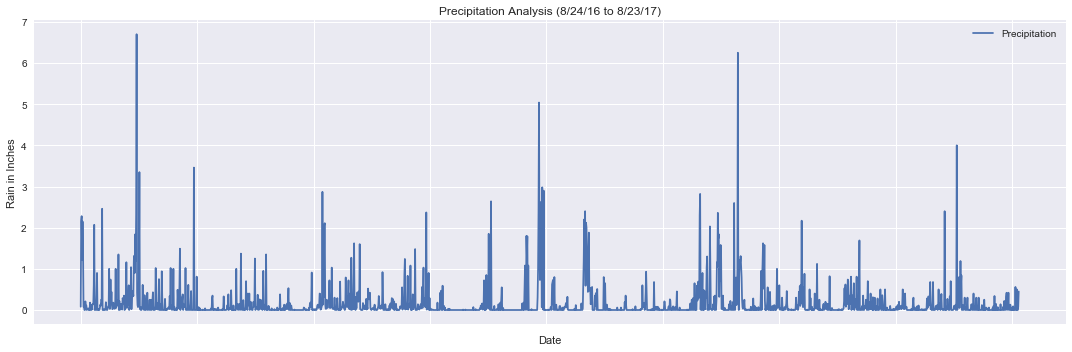

In [15]:
# plot the dataframe
##rain_df.plot('date', 'prcp')
rain_df.plot(x="date",y="prcp",kind="line",grid=True,figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# summary statistics
summary_statistics =rain_df.describe()
summary_statistics

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
# Design a query to calculate the total number of stations.
total_no_of_stations = session.query(func.count(Station.station)).all()
total_no_of_stations


[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
sta

('USC00519281', 2772)

In [1]:
# Choose the station with the highest number of temperature observations.

most_active = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active


In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(Measurement.station,Measurement.tobs).filter(Measurement.date > '2016-08-23').all()
temp_query

[('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 76.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 75.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 81.0),
 ('USC00519397', 77.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 82.0),
 ('USC00519397', 81.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397',

In [22]:
#   * Filter by the station with the highest number of observations in the last one year
temp_query2 = session.query(Measurement.station, func.count(Measurement.station)).\
              filter(Measurement.date > '2016-08-23').\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
temp_query2

('USC00519397', 360)

In [23]:
# unzip the above list of tuples
stations,temps = zip(*temp_query)
stations_list = list(stations)
temps_list = list(temps)
temps_list

[79.0,
 80.0,
 79.0,
 77.0,
 78.0,
 78.0,
 79.0,
 80.0,
 81.0,
 80.0,
 79.0,
 75.0,
 79.0,
 76.0,
 76.0,
 80.0,
 79.0,
 78.0,
 76.0,
 78.0,
 78.0,
 75.0,
 79.0,
 80.0,
 79.0,
 81.0,
 77.0,
 77.0,
 78.0,
 76.0,
 82.0,
 81.0,
 78.0,
 80.0,
 80.0,
 79.0,
 80.0,
 80.0,
 80.0,
 79.0,
 79.0,
 79.0,
 80.0,
 80.0,
 79.0,
 78.0,
 76.0,
 75.0,
 80.0,
 80.0,
 79.0,
 80.0,
 79.0,
 78.0,
 78.0,
 80.0,
 81.0,
 79.0,
 77.0,
 79.0,
 78.0,
 77.0,
 77.0,
 78.0,
 77.0,
 78.0,
 77.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 71.0,
 72.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 75.0,
 76.0,
 76.0,
 75.0,
 72.0,
 74.0,
 75.0,
 73.0,
 76.0,
 75.0,
 68.0,
 75.0,
 75.0,
 72.0,
 69.0,
 71.0,
 68.0,
 67.0,
 69.0,
 73.0,
 70.0,
 70.0,
 70.0,
 66.0,
 67.0,
 70.0,
 66.0,
 62.0,
 71.0,
 73.0,
 69.0,
 77.0,
 74.0,
 71.0,
 72.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 73.0,
 69.0,
 66.0,
 62.0,
 66.0,
 63.0,
 62.0,
 63.0,
 64.0,
 66.0,
 60.0,
 64.0,
 63.0,
 78.0,
 67.0,
 67.0,

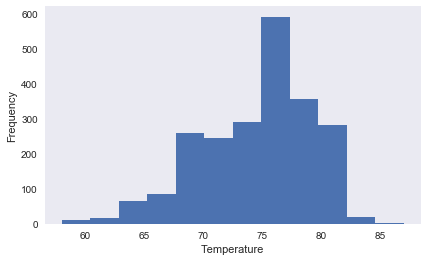

In [24]:
# Plot the results as a histogram with `bins=12'
plt.hist(x = temps_list, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid()

![precipitation](Images/station-histogram.png)

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    temp_stats = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                 filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return temp_stats
temp_stats_list = calc_temps('2017-01-01','2018-01-01')
print(temp_stats_list)
    
    

[(58.0, 74.14387974230493, 87.0)]


<BarContainer object of 1 artists>

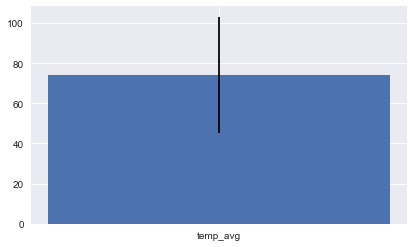

In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
x = 'temp_avg'
plt.bar(x=x,height= temp_stats_list[0][1],yerr =(temp_stats_list[0][2]- temp_stats_list[0][0]) )

<IPython.core.display.Javascript object>


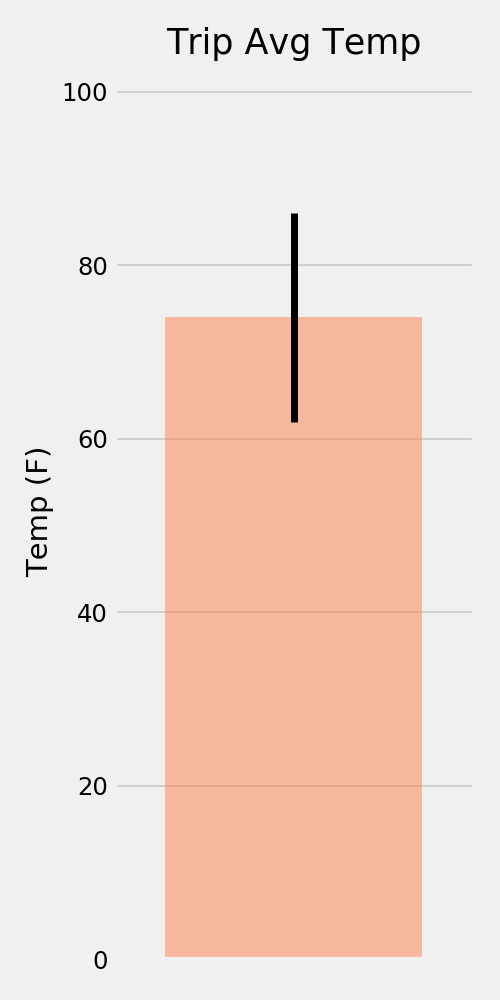

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_query = session.query(Measurement.station, func.avg(Measurement.prcp)).\
             filter(Measurement.date>='2017-01-01').filter(Measurement.date<'2018-01-01').\
             group_by(Measurement.station).all()
rain_query

[('USC00513117', 0.1633018867924529),
 ('USC00514830', 0.13053892215568874),
 ('USC00516128', 0.3371568627450982),
 ('USC00517948', 0.07883720930232559),
 ('USC00519281', 0.19755656108597294),
 ('USC00519397', 0.04634782608695649),
 ('USC00519523', 0.1437894736842105)]

## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(inputdate):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    daily_normals_query = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                          filter(Measurement.date == func.strftime("%Y-%m-%d",inputdate)).all()
    return daily_normals_query

daily_normals('2017-08-20')

[(78.0, 79.66666666666667, 81.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
date_list = ['2017-01-01','2017-01-02','2017-01-03','2017-01-04','2017-01-05']
daily_normals_list = []
for date in date_list:
    temp_stat = daily_normals(date)
    daily_normals_list.append(temp_stat)
daily_normals_list


[[(62.0, 69.33333333333333, 74.0)],
 [(66.0, 69.2, 74.0)],
 [(63.0, 67.66666666666667, 73.0)],
 [(62.0, 67.16666666666667, 73.0)],
 [(63.0, 67.5, 72.0)]]

In [35]:
# Plot the daily normals as an area plot with `stacked=False`

tMin_list = []
tMax_list = []
tAvg_list = []
for row in daily_normals_list:
    tMin_list.append(row[0][0])
    tAvg_list.append(row[0][1])
    tMax_list.append(row[0][2])
tMin_list
tAvg_list
tMax_list
    


[74.0, 74.0, 73.0, 73.0, 72.0]

In [36]:
df = pd.DataFrame({"Date":date_list,
                  "TMin":tMin_list,
                  "TMax":tMax_list,
                  "TAvg":tAvg_list})
df

,Date,TMin,TMax,TAvg
0,2017-01-01,62.0,74.0,69.333333
1,2017-01-02,66.0,74.0,69.200000
2,2017-01-03,63.0,73.0,67.666667
3,2017-01-04,62.0,73.0,67.166667
4,2017-01-05,63.0,72.0,67.500000


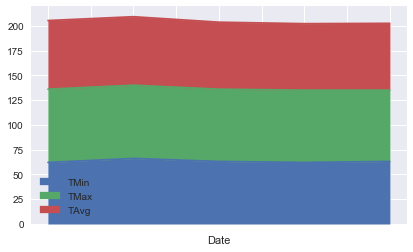

In [37]:
df.plot(kind="area",x='Date',y=['TMin','TMax','TAvg'],stacked='True')

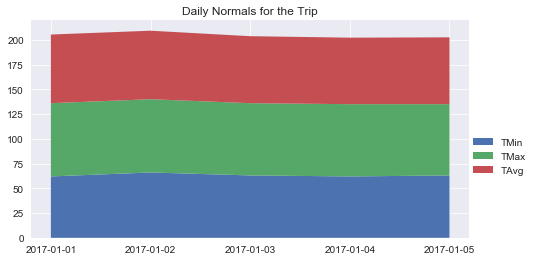

In [38]:
# Plotting using matplotlib
fig,ax = plt.subplots(figsize=(7,4))
labels = ["TMin","TMax","TAvg"]
ax.stackplot(df['Date'], df['TMin'],df['TMax'],df['TAvg'], labels=labels)
ax.grid(linestyle="-",alpha=0.8)
ax.set_title(f"Daily Normals for the Trip")
ax.legend(bbox_to_anchor=(1.15,0.5))